In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives, Precision, Recall, AUC
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [3]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
labels = ['Abnormal(Ulcer)','Normal(Healthy skin)']

In [5]:
X_train = []
y_train = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DFU_dataset','train',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        try:
            img = cv2.resize(img,(image_size, image_size))
        except:
            break
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/DFU_dataset','test',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 115/115 [00:01<00:00, 87.91it/s] 


In [6]:
X_train.shape

(3200, 224, 224, 3)

In [7]:
X_train, y_train = shuffle(X_train,y_train, random_state=1010)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=1010)

In [9]:
X_train.shape

(2880, 224, 224, 3)

In [10]:
X_test.shape

(320, 224, 224, 3)

In [11]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [12]:
import keras
import keras.utils
from keras import utils as np_utils
import numpy as np
from keras import layers
from keras.models import Model, load_model
import pydot
from keras.utils.vis_utils import plot_model
from matplotlib.pyplot import imshow

Model Build

In [13]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
resNet50 = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in resNet50.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(resNet50.output)
x = Dense(1024,activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(512,activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=resNet50.inputs, outputs=prediction)
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='resnet.png')

Output hidden; open in https://colab.research.google.com to view.

In [14]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= 'accuracy')

In [15]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("Xception.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [16]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =50, verbose=1, batch_size=32,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 0.2983 - accuracy: 0.8989
Epoch 1: val_accuracy improved from -inf to 0.95139, saving model to Xception.h5
81/81 [==============================] - 23s 126ms/step - loss: 0.2983 - accuracy: 0.8989 - val_loss: 0.1306 - val_accuracy: 0.9514 - lr: 0.0010
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.1188 - accuracy: 0.9525
Epoch 2: val_accuracy did not improve from 0.95139
81/81 [==============================] - 9s 106ms/step - loss: 0.1188 - accuracy: 0.9525 - val_loss: 0.1254 - val_accuracy: 0.9514 - lr: 0.0010
Epoch 3/50
81/81 [==============================] - ETA: 0s - loss: 0.0906 - accuracy: 0.9676
Epoch 3: val_accuracy improved from 0.95139 to 0.96875, saving model to Xception.h5
81/81 [==============================] - 9s 108ms/step - loss: 0.0906 - accuracy: 0.9676 - val_loss: 0.1029 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 4/50
81/81 [==============================] - ETA: 0s - loss: 0

<ipython-input-17-6e3060500447>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


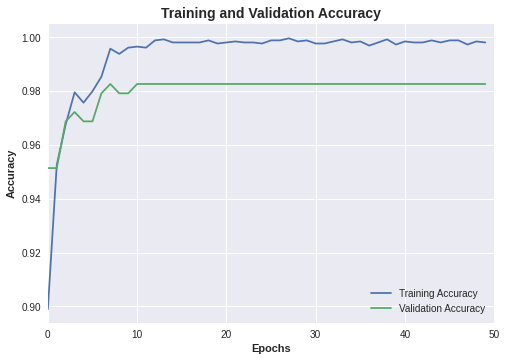

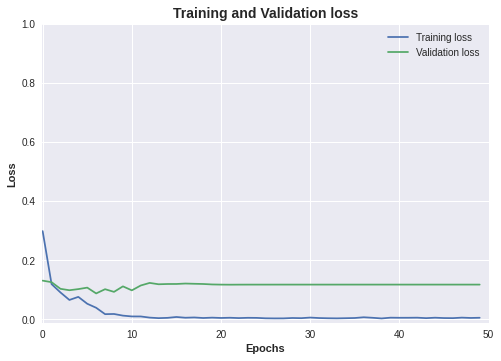

In [17]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy',fontweight='bold')
plt.xlim([0,50])
plt.ylim([min(plt.ylim()),1.005])
plt.title('Training and Validation Accuracy',fontweight='bold', fontsize=14)
plt.xlabel('Epochs',fontweight='bold')
# plt.legend(loc='best')
plt.savefig('resNetV25TV',dpi=400)
plt.show()

acc = history.history['loss']
val_acc = history.history['val_loss']

plt.plot(acc, label='Training loss')
plt.plot(val_acc, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('Loss',fontweight='bold')
plt.xlim([-0.05,50])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation loss',fontweight='bold', fontsize=14)
plt.xlabel('Epochs',fontweight='bold')
# plt.legend(loc='best')
plt.savefig('resNetV21TV',dpi=400)
plt.show()

In [18]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

10/10 [==============================] - 2s 95ms/step


In [19]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       196
           1       0.98      0.98      0.98       124

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320



In [20]:
cm = confusion_matrix(y_test_new, pred)

Confusion matrix, without normalization


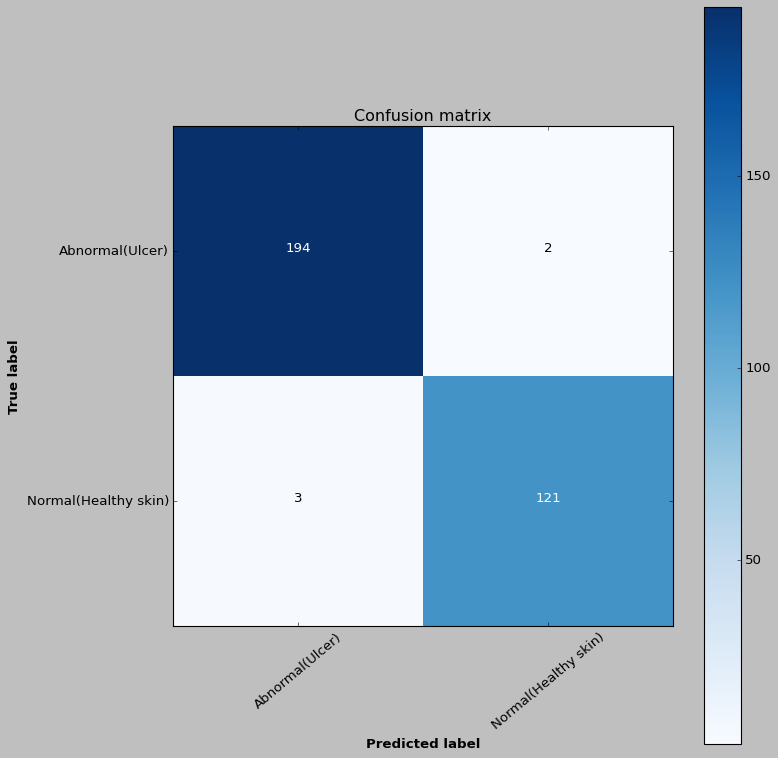

In [21]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import itertools
from itertools import product
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues, fontweight='bold'):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=40)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')

plot_confusion_matrix(cm,labels)
plt.savefig('resNetV2CM111',dpi=400)

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, roc_curve, auc,roc_auc_score

print('Accuracy: %.5f' % accuracy_score(y_test_new, pred), 'Precision: %.5f' % precision_score(y_test_new, pred),' Recall: %.5f' % recall_score(y_test_new, pred), 
      'F1 Score: %.5f' % f1_score(y_test_new, pred), 'AUC Score: %.5f' % roc_auc_score(y_test_new, pred))

Accuracy: 0.98438 Precision: 0.98374  Recall: 0.97581 F1 Score: 0.97976 AUC Score: 0.98280


In [23]:
TP=cm[1,1]
TN=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]

In [24]:
print('TP = %.5f'%TP, 'TN = %.5f'%TN, 'FP = %.5f'%FP, 'FN = %.5f'%FN)

TP = 121.00000 TN = 194.00000 FP = 2.00000 FN = 3.00000


In [25]:
specificity=TN/float(TN+FP)
print('Specificity: %.5f' % specificity)

Specificity: 0.98980


In [26]:
print( 'AUC Score: %.5f' % roc_auc_score(y_test_new, pred))

AUC Score: 0.98280


In [27]:
from sklearn.metrics import mean_squared_error
print( 'Error Rate: %.5f' % mean_squared_error(y_test_new, pred))

Error Rate: 0.01562


<ipython-input-29-abaed106e156>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


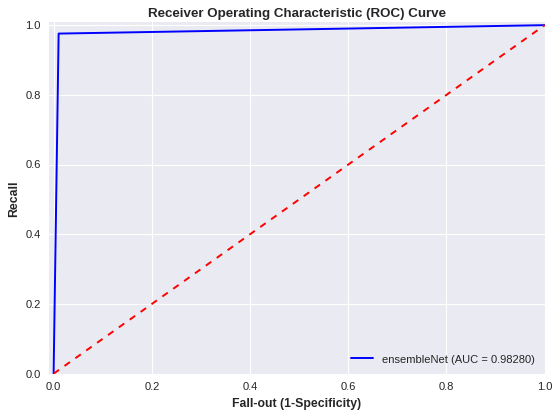

In [29]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#Print Area Under Curve
false_positive_rate, recall, thresholds = roc_curve(y_test_new, pred)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC) Curve', fontweight='bold')
plt.plot(false_positive_rate, recall, 'b', label = 'ensembleNet (AUC = %0.5f)' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.01,1.0])
plt.ylim([0.0,1.01])
plt.ylabel('Recall', fontweight='bold')
plt.xlabel('Fall-out (1-Specificity)', fontweight='bold')
plt.savefig('ensembleNetAUC',dpi=400)
plt.show()

In [30]:
acc = accuracy_score(y_test_new, pred)*100
auc=roc_auc_score(y_test_new, pred)*100
tn, fp, fn, tp = cm.ravel()
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
specificity = tn/(tn+fp)*100
print('Accuracy: {0:0.2f}%'.format(acc))
print('Precision: {0:0.2f}%'.format(precision))
print('Recall or Sensitivity: {0:0.2f}%'.format(recall))
print('Specificity: {0:0.2f}%'.format(specificity))
print('F1-score: {0:0.2f}%'.format(2*precision*recall/(precision+recall)))
print('AUC-score: {0:0.2f}%'.format(auc))
print('Train acc: {0:0.2f}%'.format(np.round((history.history['accuracy'][-1])*100, 2)))
print('val_accuracy: {0:0.2f}%'.format(np.round((history.history['val_accuracy'][-1])*100, 2)))

Accuracy: 98.44%
Precision: 98.37%
Recall or Sensitivity: 97.58%
Specificity: 98.98%
F1-score: 97.98%
AUC-score: 98.28%
Train acc: 99.81%
val_accuracy: 98.26%


In [31]:

import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io 
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

print('Notebook running: keras ', keras.__version__)
np.random.seed(222)

Notebook running: keras  2.11.0


In [32]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import ResNet50 as res_net
from skimage.io import imread
from skimage.transform import resize
import numpy as np 
from skimage import io
from skimage.transform import resize
import sklearn.cluster


In [36]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=4fe073930376bcd963e21abb3d8d9ddd6e0af3186799fea1c8ee39dc2007a704
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [41]:
from lime import lime_image
explainer =lime_image.LimeImageExplainer()
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt

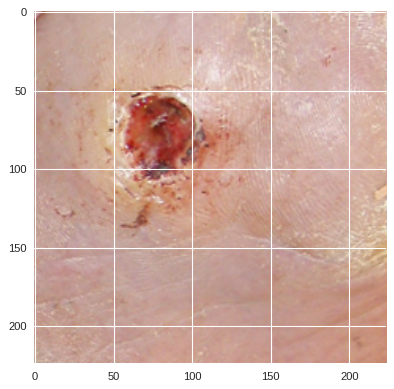

1/1 [==============================] - 0s 27ms/step
Normal(Healthy skin)
Accuracy: 99.63%


In [55]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/DFU_dataset/check_model/Abnormal(Ulcer)/Screenshot_5.jpg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

if prediction == 1:
    print('Abnormal(Ulcer)')
else:
    print('Normal(Healthy skin)')
print('Accuracy: {0:0.2f}%'.format(pct*100))


In [56]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict, 
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


(-0.5, 223.5, 223.5, -0.5)

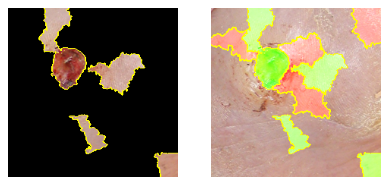

In [57]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

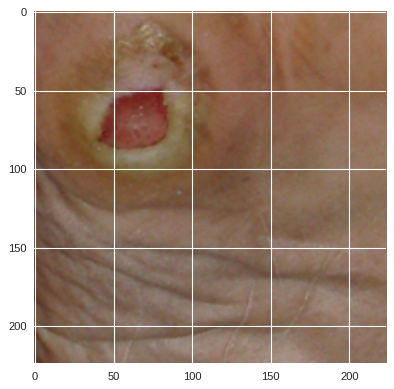

1/1 [==============================] - 0s 55ms/step
Normal(Healthy skin)
Accuracy: 99.68%


In [52]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/DFU_dataset/check_model/Abnormal(Ulcer)/Screenshot_6.jpg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

if prediction == 1:
    print('Abnormal(Ulcer)')
else:
    print('Normal(Healthy skin)')
print('Accuracy: {0:0.2f}%'.format(pct*100))

In [ ]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/DFU_dataset/check_model/Abnormal(Ulcer)/Screenshot_6.jpg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

if prediction == 0:
    print('Abnormal(Ulcer)')
else:
    print('Normal(Healthy skin)')
print('Accuracy: {0:0.2f}%'.format(pct*100))

In [53]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict, 
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


(-0.5, 223.5, 223.5, -0.5)

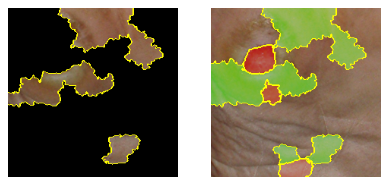

In [54]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')  

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict, 
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


(-0.5, 298.5, 298.5, -0.5)

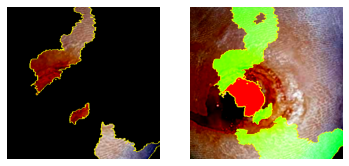

In [ ]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

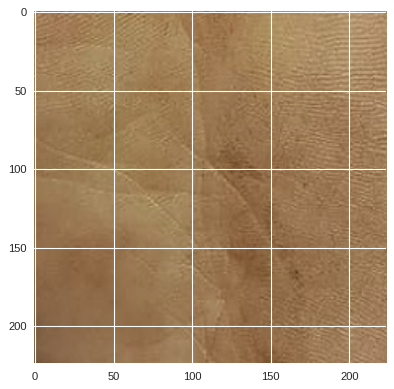

1/1 [==============================] - 0s 30ms/step
Normal(Healthy skin)
Accuracy: 99.64%


In [58]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/DFU_dataset/check_model/Normal(Healthy skin)/image (116).jpg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

if prediction == 1:
    print('Abnormal(Ulcer)')
else:
    print('Normal(Healthy skin)')
print('Accuracy: {0:0.2f}%'.format(pct*100))


In [59]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict, 
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


(-0.5, 223.5, 223.5, -0.5)

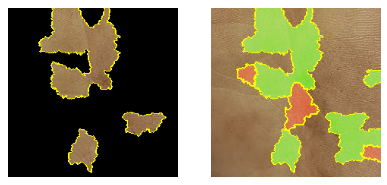

In [60]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')

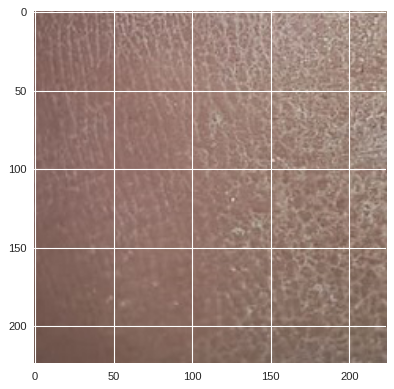

1/1 [==============================] - 0s 32ms/step
Normal(Healthy skin)
Accuracy: 99.63%


In [61]:
from tensorflow.keras.preprocessing import image
import cv2
image = load_img("/content/drive/MyDrive/DFU_dataset/check_model/Normal(Healthy skin)/image (119).jpg")
def read_and_transform_img(image):
  img = np.array(image)
  img=resize(img,(224,224))
  img=np.expand_dims(img,axis=0)
  plt.imshow(image)
  plt.show()
  return img

images=read_and_transform_img(image)
preds=model.predict(images)
prediction=np.argmax(preds)
pct=np.max(preds)

if prediction == 1:
    print('Abnormal(Ulcer)')
else:
    print('Normal(Healthy skin)')
print('Accuracy: {0:0.2f}%'.format(pct*100))


In [63]:
explanation = explainer.explain_instance(images[0].astype('double'), #the image
                                         model.predict, 
                                         top_labels=2, #want just to see the 2 main classes predicted
                                         num_samples=1000, # number of observation sampled from the original distribution in order to computer the linear regression
                                         hide_color=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


(-0.5, 223.5, 223.5, -0.5)

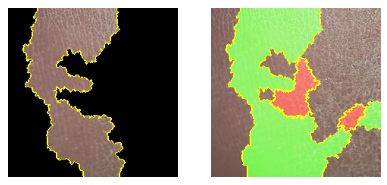

In [64]:
# maps for the first class predicted
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
# plot image and mask together
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(6,5))
ax1.imshow(mark_boundaries(temp_1,mask_1))
ax2.imshow(mark_boundaries(temp_2,mask_2))
ax1.axis('off')
ax2.axis('off')